## Dragon Real State Price Pridictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280491,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.707725,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.879000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.195000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

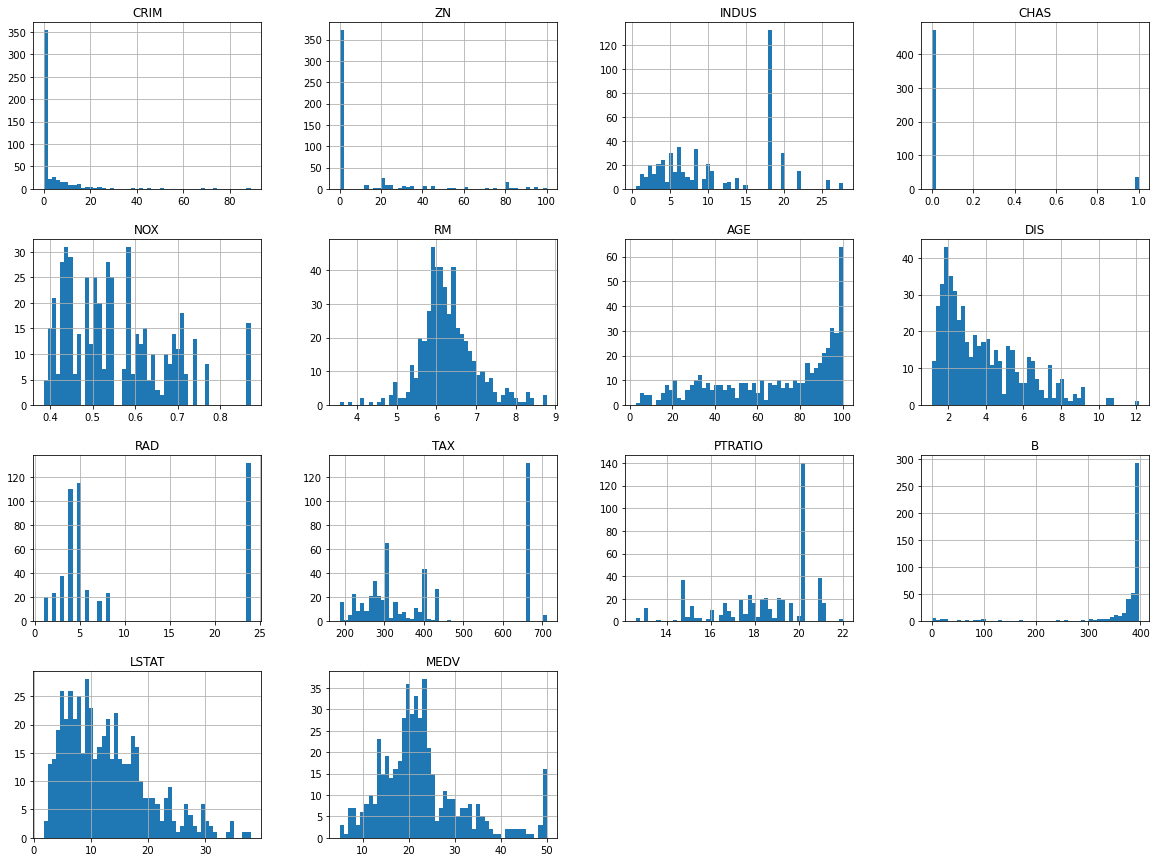

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    #print(len(permutation(len(data))))
    shuffled=np.random.permutation(len(data))
    
    print(shuffled,type(shuffled))
    print(len(data))
    print(data.shape)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]                   # dont know why we use :test_set_size & test_set_size
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
train_set, test_set = split_train_test(housing,0.2)
train_set.head()

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4


In [ ]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" )

In [ ]:
#from sklearn.model_selection import train_test_split
#train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" )

In [ ]:
#train_set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()

In [ ]:
strat_train_set['CHAS'].value_counts()

In [ ]:
95/7

In [ ]:
376/28      #they are almost same it mean we distribute data in same ratio

In [ ]:
housing = strat_train_set.copy() #check that term in 

# Looking for Correlations

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [ ]:
housing.plot(kind="scatter", x="RM",y="MEDV",alpha=0.8)

Tring out attribute combinations

In [ ]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [ ]:
housing.head()

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

In [ ]:
housing.plot(kind="scatter", x="TAXRM", y ="MEDV", alpha=0.8)

# Split data into X and Y

In [ ]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attriutes

To take care of missing attributes, you have three options:

    1. Get rid of the missing data points
    2. Get rid of the whole attribute
    3. Set the value to some value(0, mean or median)

In [ ]:
a=housing.dropna(subset=["RM"])  #option 1
a.shape

In [ ]:
housing.drop("RM",axis=1).shape #option 2
#note that there is no RM column and also not that the original housing dataframe will remain unchanged

In [ ]:
median =housing["RM"].median() #compute median for option 3

In [ ]:
housing["RM"].fillna(median)
# note that the original housing dataframe will remain unchanged

In [ ]:
housing.shape

In [ ]:
housing.describe()   # before we started imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

In [ ]:
imputer.statistics_

In [ ]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [ ]:
housing_tr.describe()

# Scikit-learn Design

primarily, three types of objects
1. Estimators - It estimates some parameter. Eg. imputer.
It has a fit method and transform method.

Fit method - Fits the datset and calculates internal parameters

2. Transformers - tranform method takes input and returns output based on the learnigns from fit(). It also has a convenience function called fit_transform()which fits and then transforms.

3. predictors - LinearRegression model is an example of predictor. fit() and pridict() are two common functions. It also gives score( funtion which will evaluate teh predictions.

# Feature scaling

Primarily, two types of feature scaling methods:
1. min-max scaling(Normalization)
    (value-min)/max-min)
    sklearn provedes a class called MinMaxScaler for this
    
2. Standardization
    (value-mean)/std
    sklearn provides a class alled standard scaler for this

# Creating a Pipeline 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    # ......... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing) #we can use housing_tr but we are using just housing because 
                                    #because we already using imputer in our pipeline so we can use housing

In [ ]:
housing_num_tr   #its numpy array. we take numppy array bescause predictors take input of numpy array 

In [ ]:
housing_num_tr.shape

# Selecting a desired model for Dragon Real Estates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
#model = DecisionTreeRegressor()    # we are not linearregression because it give 23% acc so we are using some other model
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_labels = housing_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

In [ ]:
some_labels

# Evaluating the model 

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmes = np.sqrt(mse)

In [ ]:
mse

# using better evaluation  technique - cross validation

In [ ]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

# Saving the model

In [ ]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

# Testing the model on test data

In [ ]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test =strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

In [ ]:
final_rmse

In [ ]:
prepared_data[0]

# Using the model

In [ ]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23186681, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)